# Avocado

Description: In this dataset Dependet variable and indepedent variables contains the descrate continues values, dependent variable is AveragePrice of the Avocado fruit

These are the name of Features from the dataset: -

    Unnamed: 0
    Date	
    AveragePrice
    Total Volume
    4046
    4225
    4770
    Total Bags
    Small Bags
    Large Bags
    XLarge Bags
    type
    year
    region

In [456]:
#importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [457]:
#loading the data set
df= pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [458]:
df.shape

(18249, 14)

Observation: 
1. Data set contains the 18249 records and 14 variables 

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observation: 
1. dataset contains interger,object and float values 
2. 2 variables conatins intger, 2 object and remaining all variables are float data types  

In [460]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation: 
1. Dataset conatins the no null values 

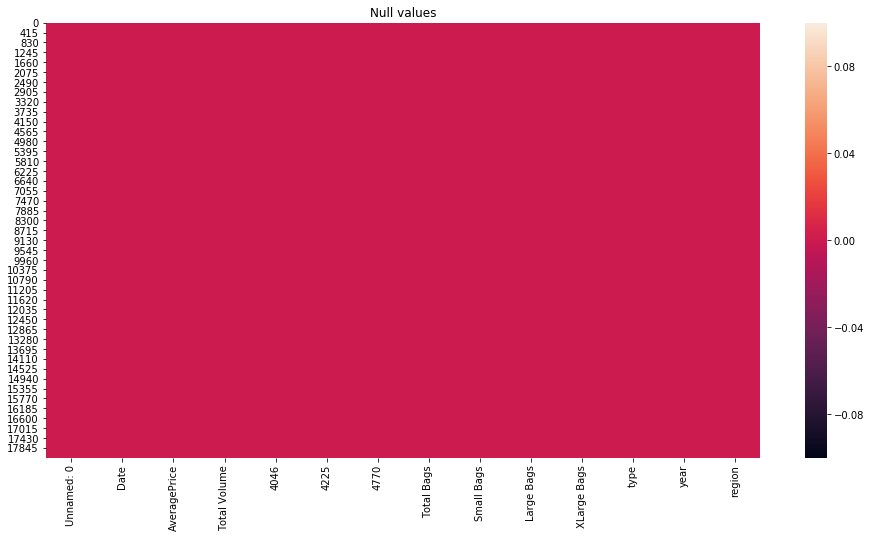

In [461]:
#Heat map to check the null values

plt.figure(figsize=[16,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: 
1. No variable columns contains missing and null values 

In [462]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observation:

1. Clearly notice that dependent variable median value is less then mean value and Equal data distrubtion from min 25%, 50% 75%  and max values

2. Count of the all columns values are same 

3. Min and Max there is no much defferance 

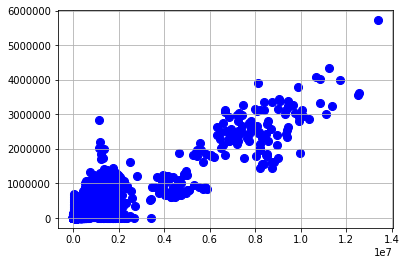

In [463]:
# plot data points
plt.scatter(df["Small Bags"], df["Large Bags"], color = "b", s = 65)
plt.grid()

Observation: We clearly notice that variables small and large bags contians the outlier data points in the datasets 

LosAngeles             338
Nashville              338
RichmondNorfolk        338
TotalUS                338
NorthernNewEngland     338
Midsouth               338
GrandRapids            338
StLouis                338
Philadelphia           338
MiamiFtLauderdale      338
Boston                 338
NewOrleansMobile       338
California             338
Sacramento             338
Pittsburgh             338
BaltimoreWashington    338
West                   338
HartfordSpringfield    338
LasVegas               338
HarrisburgScranton     338
Spokane                338
CincinnatiDayton       338
SanFrancisco           338
Plains                 338
SanDiego               338
Jacksonville           338
SouthCarolina          338
PhoenixTucson          338
Charlotte              338
Syracuse               338
Indianapolis           338
Roanoke                338
BuffaloRochester       338
Southeast              338
Chicago                338
Houston                338
SouthCentral           338
A

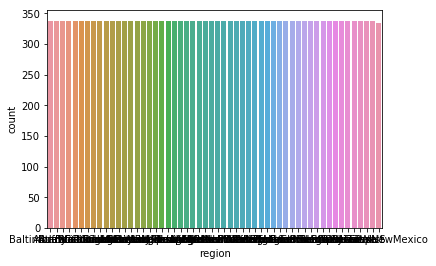

In [464]:
print(df['region'].value_counts())
sns.countplot(df['region'])
plt.show()

Observation: Region Mexico has less count 335 remaining all regions have the same counnt 338

In [465]:
print(df['type'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


Observation: there are only two type of avocado "Convention and organic"

In [466]:
print(df['year'].value_counts())

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


Observation: 
1. Dataset contains the Four years fruit sale data 2017 have highest records 5722 and least is the 2018 have the only 1296 records 

In [582]:
df.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0


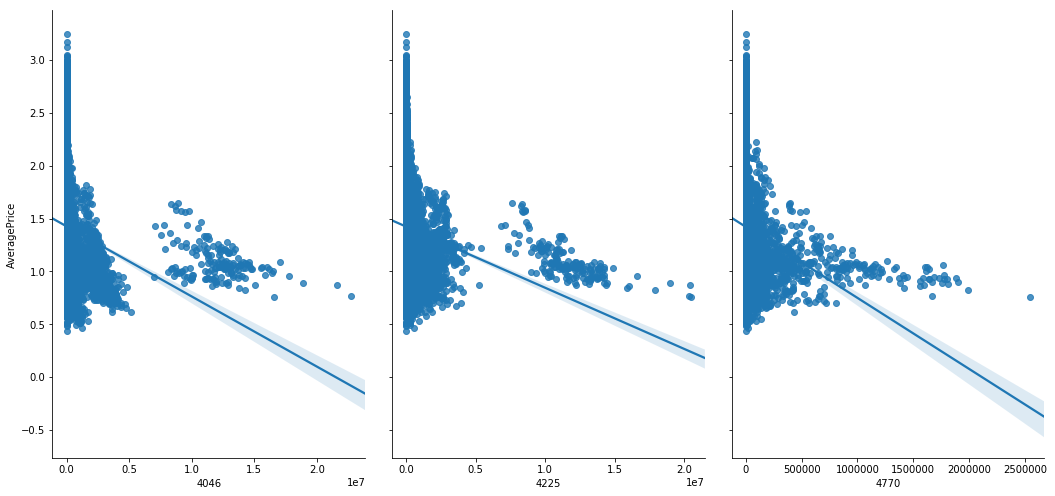

In [586]:
sns.pairplot(df, x_vars=['4046','4225','4770'], y_vars='AveragePrice', size=7, aspect=0.7, kind='reg')

Observation: We clearly see that negative relation between these three variables and average price 

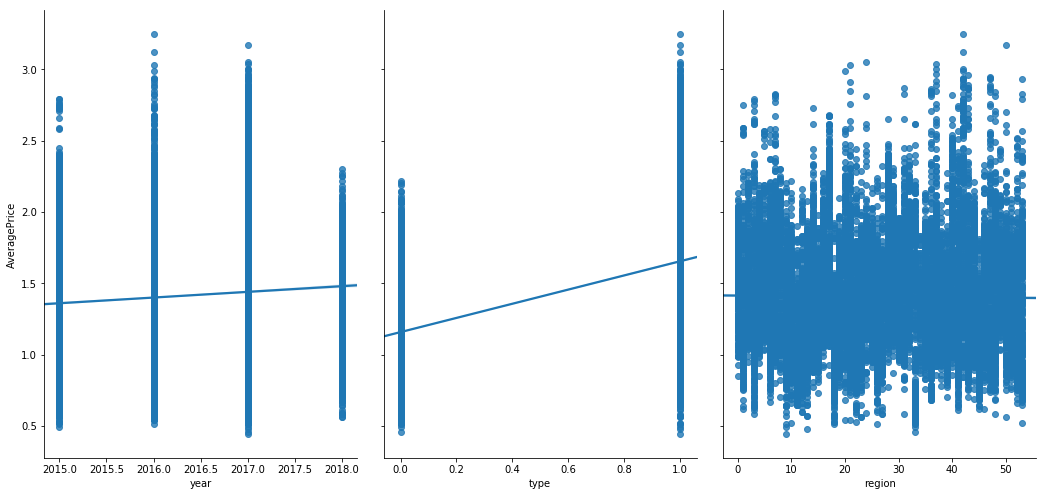

In [584]:
sns.pairplot(df, x_vars=['year','type','region'], y_vars='AveragePrice', size=7, aspect=0.7, kind='reg')

Observation: 
1. We clary see that type organic fruit average price slightly high then the conventional type
2. average price of the fruit change slightly from 2015 to 2018

In [467]:
#droping the Unamed column form the data set 
df=df.drop(['Unnamed: 0'], axis=1)

In [468]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [469]:
# plot pairplot
#sns.pairplot(df)
#plt.show()

In [470]:
#Selecting the object data types 

objDf = df.select_dtypes(include=['object']).copy()
objDf.head(2)

,Date,type,region
0,2015-12-27,conventional,Albany
1,2015-12-20,conventional,Albany


In [471]:
#Encoding the Cateogorical variables 
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['type'] = le.fit_transform(df['type'])

In [472]:
#Converting object type to date type
df['Date'] = pd.to_datetime(df['Date'])

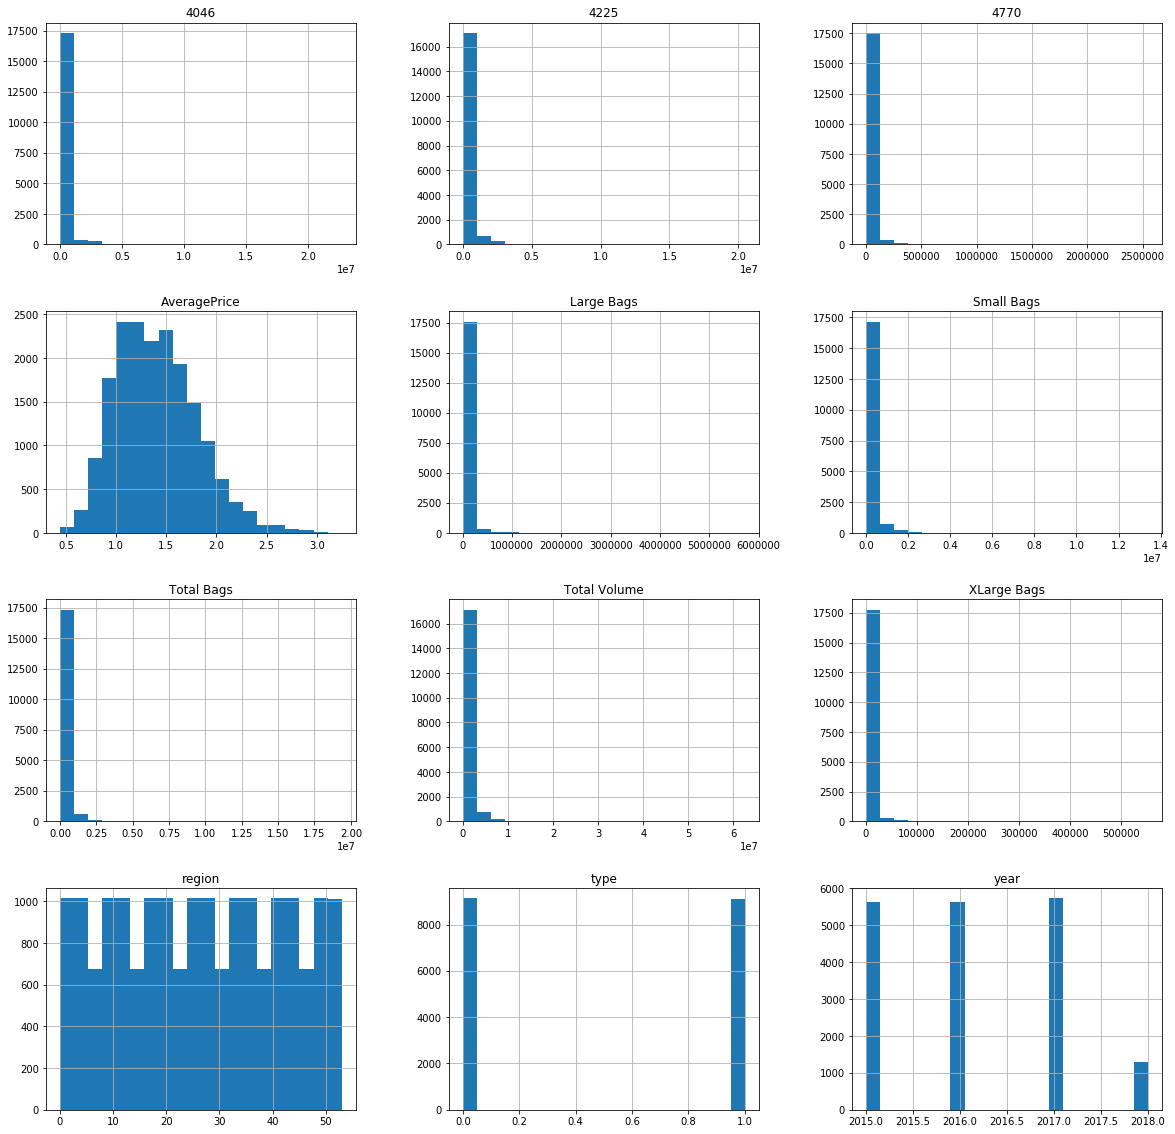

In [473]:
#plot histogram
df.hist(bins=20,figsize=(20,20))
plt.show()

Observation: variables 4046,4225,4470, small, large and total bags data is right skewed 

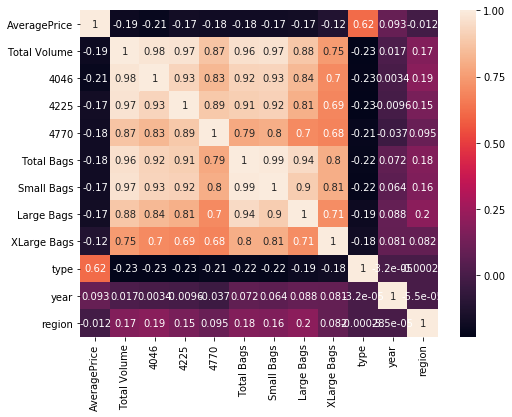

In [474]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation:
1. AvargePrice and type have positive corelation 0.62%
2. Total bags have positive relation with large bags and small bags
3. variables type have negative relation with all the other variables 
4. type and Average price has positive relation  0.64%
5. 4046 and total value have positive relation  0.98%

In [475]:
#to display the corealtion with the target variables 
corr_matrix=df.corr()
corr_matrix['AveragePrice'].sort_values(ascending = False)


AveragePrice    1.000000
type            0.615845
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

Observation:
1. depedent variable "AveragePrice" have only two positive corelation  with independent variables "type" and "year"  
2. Remaining all variables have a negative corelation 

In [476]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

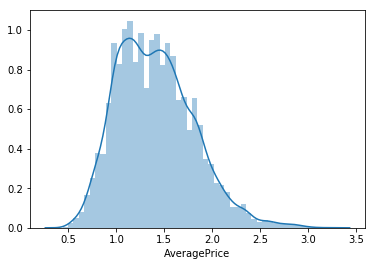

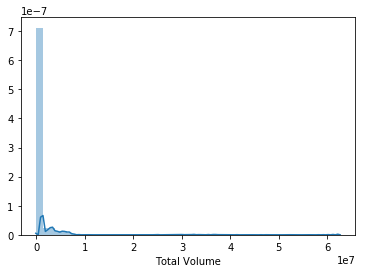

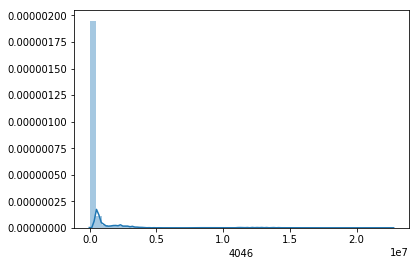

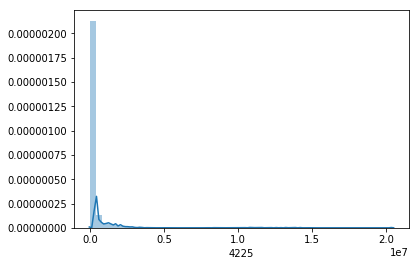

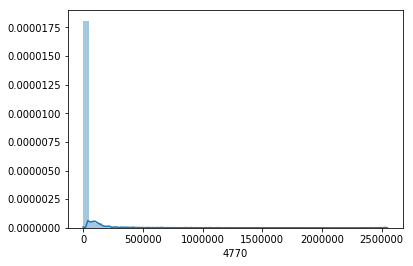

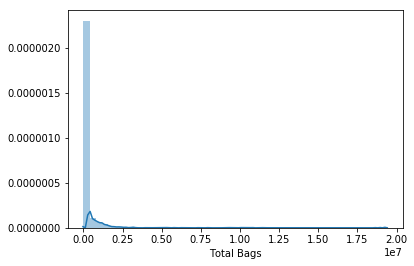

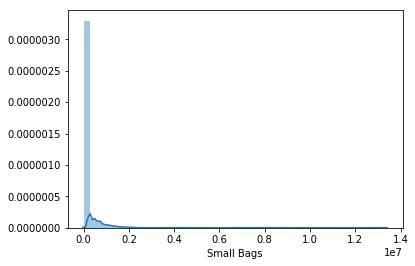

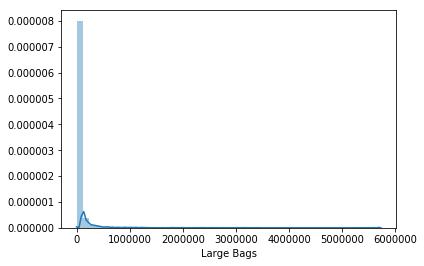

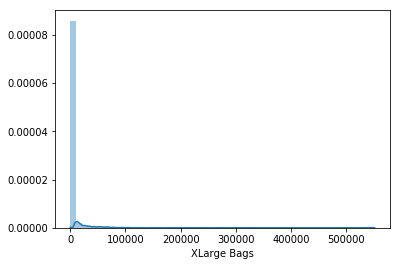

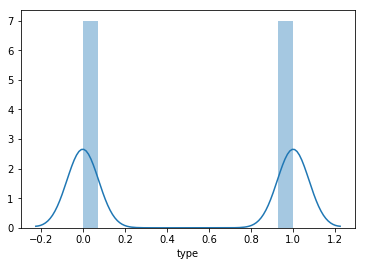

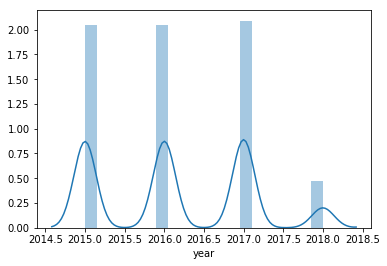

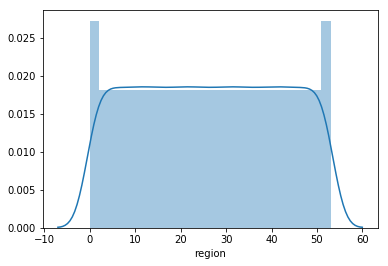

In [447]:
columns =['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

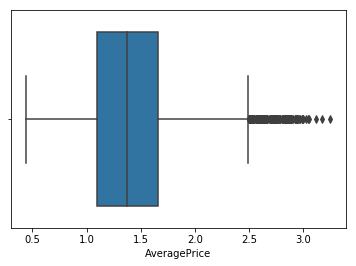

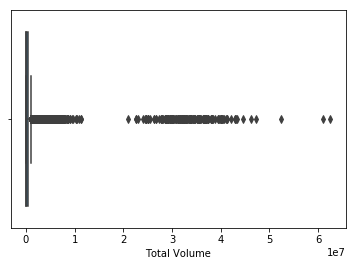

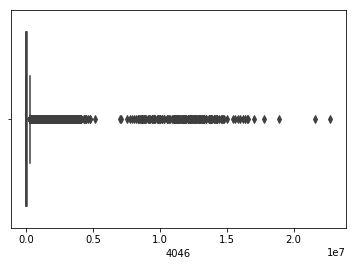

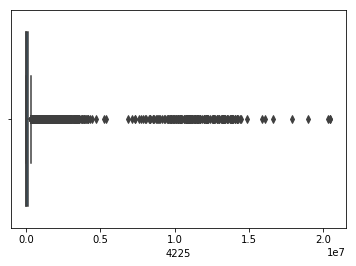

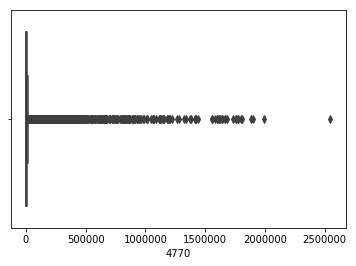

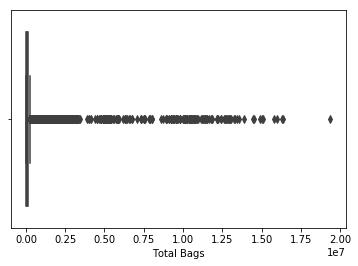

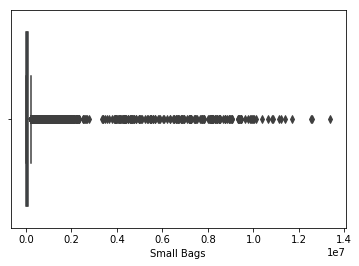

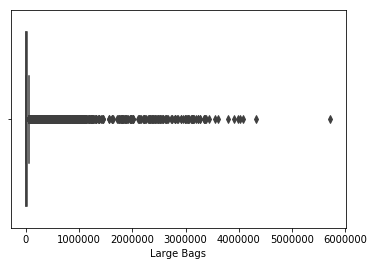

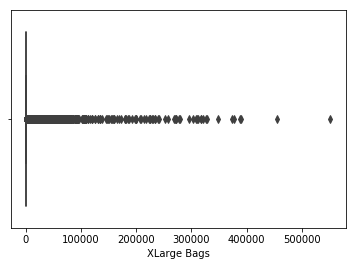

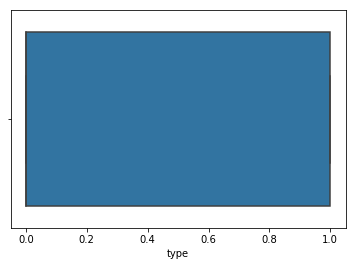

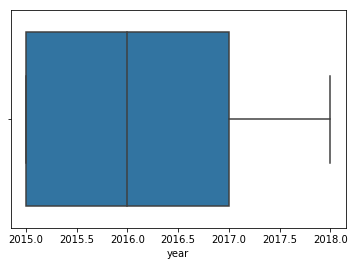

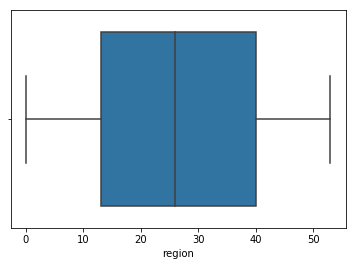

In [448]:
# with the help of box plot checking the outliers in data set 
for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation:
1. Average price, total volume,4046,4225,4770,total Bags, small bags, Large bags, Xlarge bags, variables have outliers
2. Region, Year, Type variables not have outliers 
    

In [ ]:
#Remove the outliers
df.head()
  
''' Detection '''
# IQR
Q1 = np.percentile(df[columns], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df[columns], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df[columns] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df[columns] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ",df.shape) 

Observation: After removing the outliers from the data set we are loosing the half of the dataset records and we not getting model accuracy that much high
1. Old Shape:  (18249, 13)
2. New Shape:  (7968, 13)

In [477]:
df.shape

(18249, 13)

### Spliting the data into x and y set

In [478]:
#Spliting the data into x and y set
x =df.drop(['AveragePrice','Date'],axis=1)
y=df['AveragePrice']

### Spliting the data into train_test_split

In [480]:
# Spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [503]:
#checking the sahpe of the training dataset
print(x_train.shape, y_train.shape)

(14599, 11) (14599,)


Observation: X_train have 14599 records and 11 variables 

### Logestic Regression Model 

In [547]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred.reshape(-1,1)

array([[1.12218676],
       [1.30980951],
       [1.65590957],
       ...,
       [1.18368608],
       [1.65554766],
       [1.15013155]])

array([[1.12218676],
       [1.30980951],
       [1.65590957],
       ...,
       [1.18368608],
       [1.65554766],
       [1.15013155]])

In [532]:
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:", mean_squared_error(y_test,y_pred))

print('Root Mean Squared error(RMSE):', np.sqrt(mean_squared_error(y_test,y_pred)))



Mean absolute error: 0.2413657753457789
Mean squared error: 0.09903587955616934
Root Mean Squared error(RMSE): 0.3146996656435614


In [523]:
model.coef_

array([-2.05413268e-04,  2.05321353e-04,  2.05527177e-04,  2.04966205e-04,
        4.01938857e-03, -3.81396559e-03, -3.81412384e-03, -3.81218121e-03,
        4.91793262e-01,  3.92508045e-02,  4.13791748e-04])

In [524]:
model.intercept_

-77.98295144883924

In [535]:
#R2 score --> coefficient of determination 
#the propotion of the variance in the dependent variable that is predictable from the independent variables
#i.e change coming in Y whenever x is being changed
from sklearn.metrics import r2_score
print("We getting the R2 score is :",r2_score(y_test, y_pred))

We getting the R2 score is : 0.38325806761604386


In [536]:
from sklearn.tree import DecisionTreeRegressor
DCTR = DecisionTreeRegressor(random_state = 0)
DCTR.fit(x_train, y_train)

#Predicting the number of win matches by passing the values 
pred = DCTR.predict(x_test)
DCTR.predict([[64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0]])

array([1.33])

In [537]:
t1=[64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0] # t1 actual values is 1.33
t2=[13703.15,145.56,6329.81,0.00,7227.78,1443.33,5784.45,0.0,1,2015,39]  # t2 actual values is 1.08
t3=[1355.50,50.54,127.76,8.74,1168.46,1168.46,0.00,0.0,1,2015,16] # t3 actual values is 1.68

print(DCTR.predict([t1]))
print(DCTR.predict([t2]))
print(DCTR.predict([t3]))


[1.33]
[1.2]
[1.92]


Observation: t1.Acutal value of the fruite is 1.33 $  but Decision Tree Regression model is predicting the  1.28$ The model  
1. Model Predicting t1. value: 1.28 , actual t1 value : 1.33 
2. Model Predicting t2. value: 0.97 , actual t1 value : 1.08
3. Model Predicting t3. value: 1.64 , actual t1 value : 1.68 

In [530]:
print(r2_score(y_test, pred))

0.6759250532168286


Observation: Decision tree Regression model getting the r2 score is 67%

In [538]:
#### Random Forest Regression model 

In [574]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(x_train, y_train)

y_predRFR =RFR.predict(x_test)
print("Predicted values:",y_predRFR.reshape(-1,1), "\n" "Actual values:",y_test.head())


Predicted values: [[1.066]
 [1.146]
 [1.718]
 ...
 [1.26 ]
 [1.854]
 [1.046]] 
Actual values: 1993     1.06
5972     1.13
14069    2.12
4295     1.14
6750     1.30
Name: AveragePrice, dtype: float64


In [580]:
print("RMSE score is :",np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

RMSE score is : 0.16864612703641776


In [575]:
print(RFR.predict([t1]))
print(RFR.predict([t2]))
print(RFR.predict([t3]))

[1.329]
[1.253]
[1.944]


Observation: Random forest model predicting Average price value is very near to the actual values 

1. Model Predicting t1. value: 1.329 , actual t1 value : 1.33
2. Model Predicting t2. value: 1.253 , actual t1 value : 1.08
3. Model Predicting t3. value: 1.944 , actual t1 value : 1.68

In [576]:
## SVR MODEL

In [577]:
from sklearn.svm import SVR
SVM = SVR(kernel = 'rbf')
SVM.fit(x_train, y_train)

y_p=SVM.predict(x_test)
#y_p #predict the new results 
# RMSE
print("RMSE score is :",np.sqrt(metrics.mean_squared_error(y_test, y_p)))

RMSE score is : 0.40072352736616607


In [578]:
print(SVM.predict([t1]))
print(SVM.predict([t2]))
print(SVM.predict([t3]))


[1.40924309]
[1.40924309]
[1.40924309]


Observation: SVM model is not predicting the value near to actual values 

#### SAVING the MODEL
Randomforest model is predicting the value very near to the acual values so we saving the that model

In [581]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(RFR, 'RFR.pkl')
  
# Load the model from the file
RFR_joblib = joblib.load('RFR.pkl') 
  
# Use the loaded model to make predictions
#RFR_joblib.predict(x_test)
